In [97]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [98]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [99]:
# checking duplicates
df.duplicated().sum()

np.int64(3854)

In [100]:
df.shape

(100000, 9)

In [101]:
df = df.drop_duplicates()
df.shape

(96146, 9)

In [102]:
# checking missing values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [103]:
df['gender'].value_counts()

,count
gender,
Female,56161
Male,39967
Other,18


In [104]:
df['smoking_history'].value_counts()

,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


In [105]:
# checking data types
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [106]:
# train test splitting
from sklearn.model_selection import train_test_split
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((76916, 8), (19230, 8))

### Peform explanatory data analysis with train data

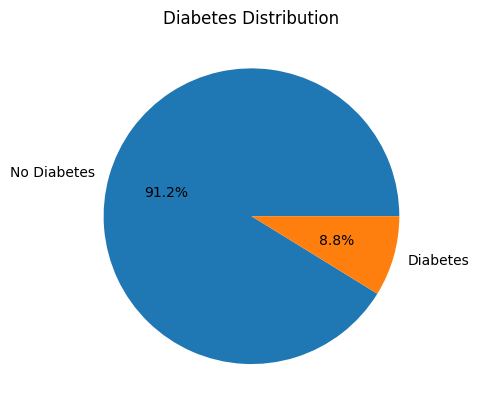

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(y_train.value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.show()

The response variable is perform class imbalanced, so we need to take into account in advanced analysis process.

In [108]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

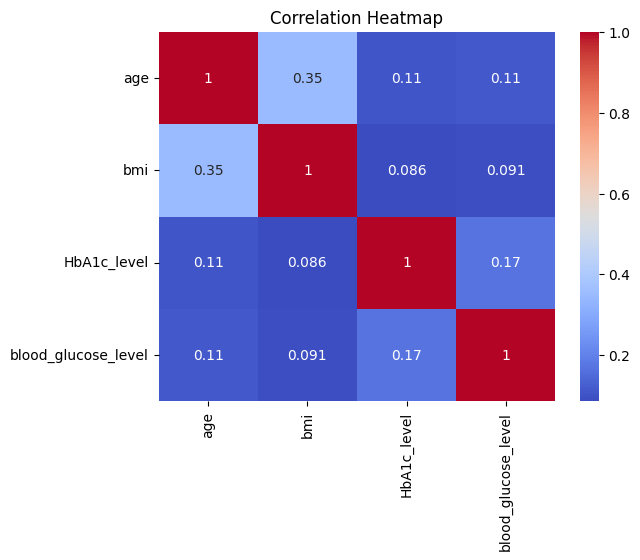

In [109]:
num_cols = ['age','bmi','HbA1c_level','blood_glucose_level']
sns.heatmap(X_train[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Not perform severe multicolinearity between numerical predictor variables.

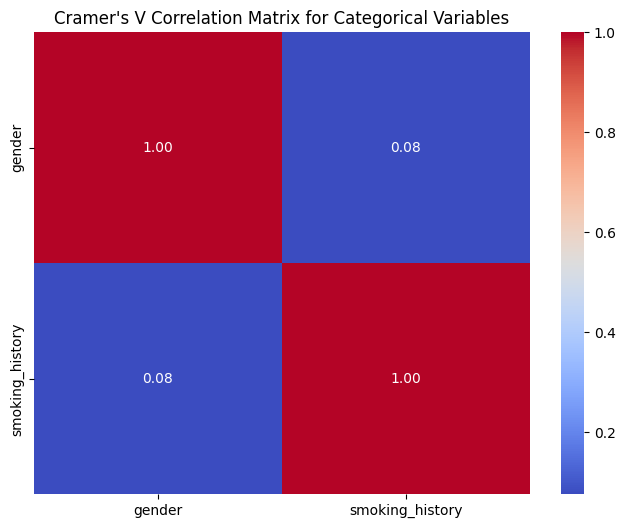

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Identify categorical columns
categorical_cols = ['gender', 'smoking_history']

# Calculate Cramer's V matrix
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramer's V Correlation Matrix for Categorical Variables")
plt.show()

Distribution of numerical variables

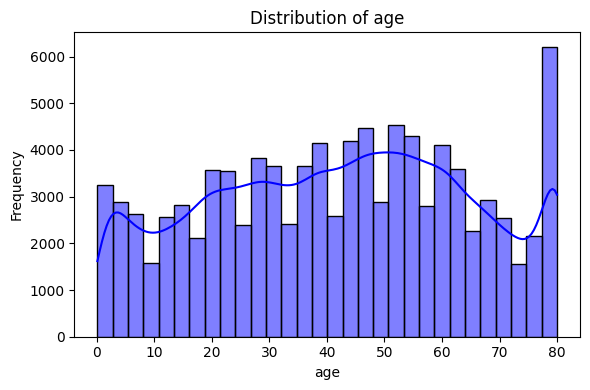

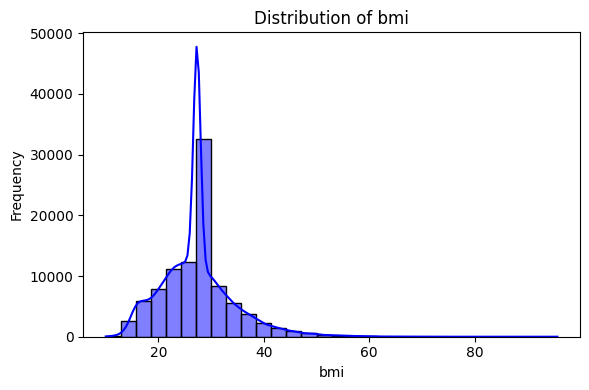

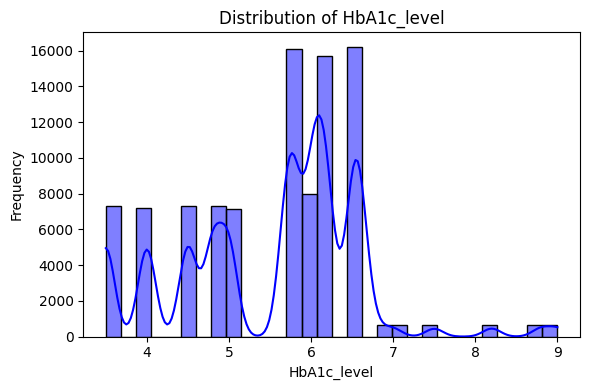

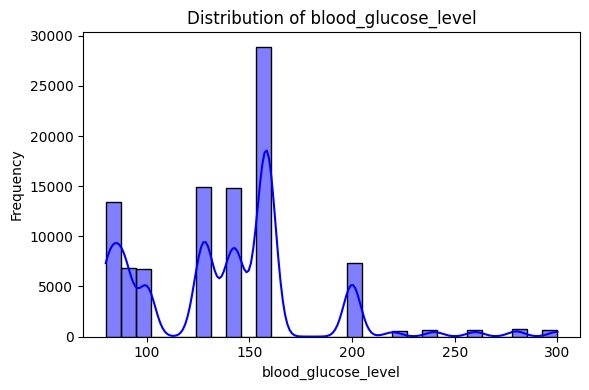

In [111]:
num_cols = ['age','bmi','HbA1c_level','blood_glucose_level']
for i in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[i], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    #plt.grid(True)
    plt.tight_layout()
    plt.show()

Distribution of categorical Variables

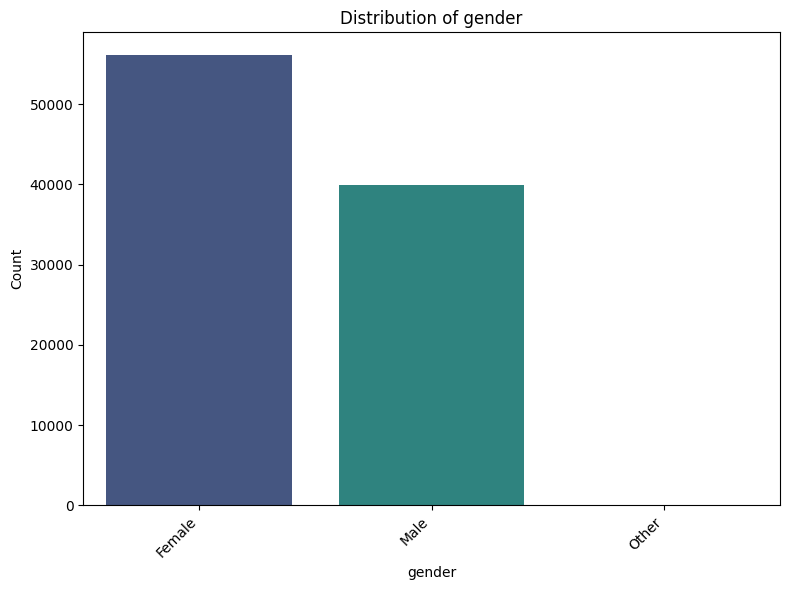

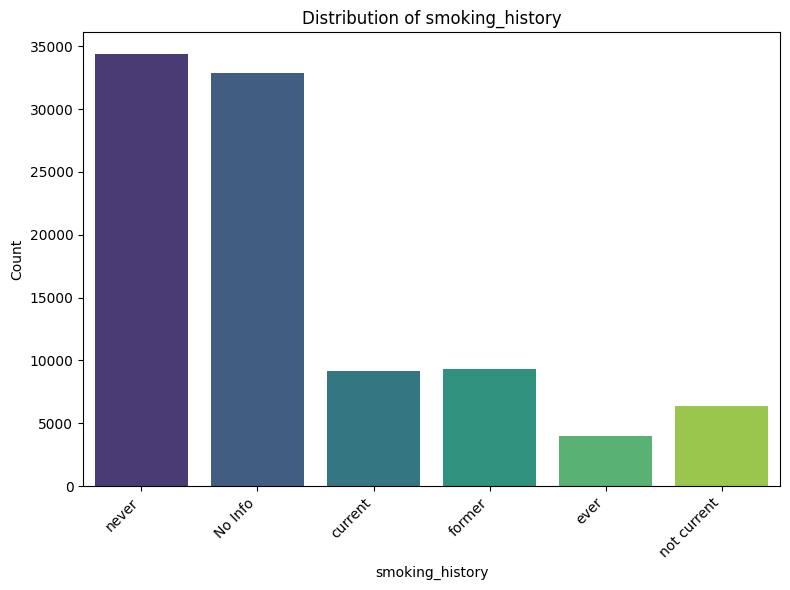

In [112]:
categorical_cols_to_plot = ['gender', 'smoking_history']

for col in categorical_cols_to_plot:
    plt.figure(figsize=(8, 6))
    # Use the original df for plotting categorical variables
    if col in ['gender', 'smoking_history']:
        sns.countplot(data=df, x=col, palette='viridis', hue=col, legend=False)
    else:
        sns.countplot(data=X_train, x=col, palette='viridis', hue=col, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [113]:
print(df['hypertension'].value_counts())
print(df['heart_disease'].value_counts())


hypertension
0    88685
1     7461
Name: count, dtype: int64
heart_disease
0    92223
1     3923
Name: count, dtype: int64


In [114]:
pip install prince

In [115]:
import prince
FAMD = prince.FAMD(n_components=5)
FAMD_Data = FAMD.fit_transform(X_train)
display(FAMD_Data.head())


component,0,1,2,3,4
46612,-1.199886,-0.419130,0.240764,-1.107271,1.138911
31612,-2.660132,1.200275,-0.070308,-0.633609,-2.219231
96143,0.270366,-1.730581,0.744299,6.183669,1.247876
95691,-0.049672,0.420635,-0.602780,-0.816332,-1.635881
37658,0.051578,1.504658,4.423681,1.543867,-0.746633


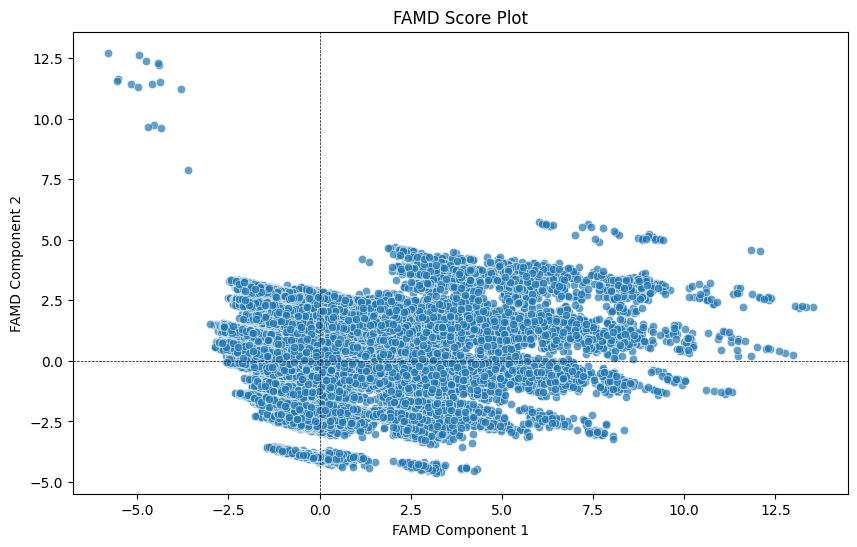

In [116]:
# Plotting FAMD score plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=FAMD_Data.iloc[:, 0], y=FAMD_Data.iloc[:, 1], alpha=0.7)

plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot")
plt.show()

According to factor analysis for mixed data we could not detect any clusters here. to make sence that i decided to perform silhoutte method below.

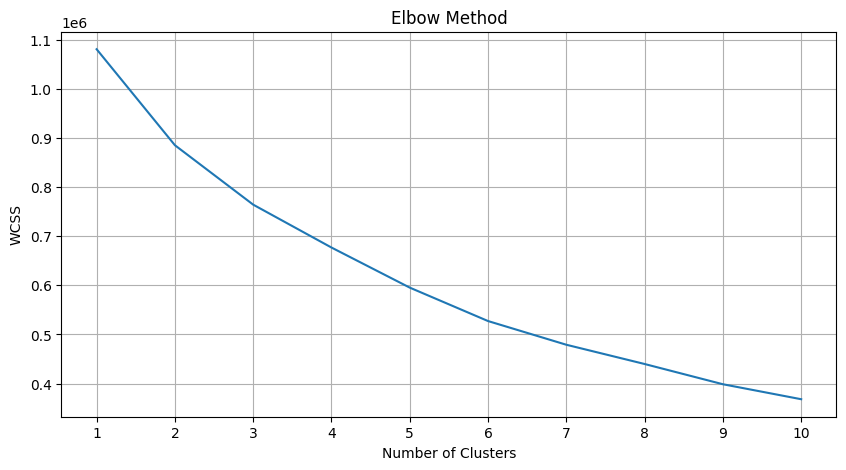

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming FAMD_Data is your data for clustering
# If you want to use the scaled data, replace FAMD_Data with X_train (after scaling)
data_for_clustering = FAMD_Data

# Elbow Method to find the optimal number of clusters
wcss = [] # Within-cluster sum of squares
for i in range(1, 11): # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



In [118]:
# apply encoding - label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_train['smoking_history'] = le.fit_transform(X_train['smoking_history'])
X_train.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
46612,0,35.0,0,0,0,31.53,6.6,155
31612,0,0.4,0,0,0,15.19,4.0,130
96143,0,60.0,0,0,2,20.90,6.5,100
95691,1,66.0,0,0,4,27.05,6.0,130
37658,1,48.0,0,0,5,24.05,4.8,145


Handle class imbalnced

In [119]:
# reduce class imbalance
from imblearn.over_sampling import SMOTE

# Apply SMOTE on the standardized data
# Set n_neighbors to a value less than or equal to the minimum number of samples in any class
smote = SMOTE(random_state=42, k_neighbors=5)
x_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)


print("Shape of original c1_x_train:", X_train.shape)
print("Shape of c1_y_train:",y_train.shape)
print("Shape of c1_x_train after scaling and SMOTE:", x_train_smote.shape)
print("Shape of c1_y_train after scaling and SMOTE:", y_train_smote.shape)
print("\nValue counts of original c1_y_train:")
print(y_train.value_counts())
print("\nValue counts of c1_y_train after SMOTE:")
print(y_train_smote.value_counts())

Shape of original c1_x_train: (76916, 8)
Shape of c1_y_train: (76916,)
Shape of c1_x_train after scaling and SMOTE: (140310, 8)
Shape of c1_y_train after scaling and SMOTE: (140310,)

Value counts of original c1_y_train:
diabetes
0    70155
1     6761
Name: count, dtype: int64

Value counts of c1_y_train after SMOTE:
diabetes
0    70155
1    70155
Name: count, dtype: int64


In [120]:
# apply scalling - Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.842551,-0.301980,-0.288976,-0.20548,-1.184402,0.624051,0.994649,0.412328
1,-0.842551,-1.842405,-0.288976,-0.20548,-1.184402,-1.789284,-1.428149,-0.198580
2,-0.842551,0.811043,-0.288976,-0.20548,-0.120243,-0.945946,0.901465,-0.931669
3,1.184843,1.078169,-0.288976,-0.20548,0.943916,-0.037623,0.435542,-0.198580
4,1.184843,0.276792,-0.288976,-0.20548,1.475995,-0.480707,-0.682673,0.167965


Applying same preprocessing for test data

In [121]:
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
2547,Female,5.0,0,0,No Info,15.14,4.5,90
34774,Male,19.0,0,0,never,22.74,6.6,85
71084,Female,52.0,0,0,never,24.27,7.5,220
50584,Male,55.0,0,0,No Info,27.32,5.7,85
80788,Female,22.0,0,0,never,28.78,4.5,200


In [122]:
X_test['gender'] = le.fit_transform(X_test['gender'])
X_test['smoking_history'] = le.fit_transform(X_test['smoking_history'])
X_test.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
2547,0,5.0,0,0,0,15.14,4.5,90
34774,1,19.0,0,0,4,22.74,6.6,85
71084,0,52.0,0,0,4,24.27,7.5,220
50584,1,55.0,0,0,0,27.32,5.7,85
80788,0,22.0,0,0,4,28.78,4.5,200


In [123]:
X_test_scaled = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.84710,-1.639615,-0.294321,-0.209294,-1.196552,-1.813199,-0.961862,-1.189220
1,1.17949,-1.016528,-0.294321,-0.209294,0.928907,-0.688126,0.994219,-1.311604
2,-0.84710,0.452179,-0.294321,-0.209294,0.928907,-0.461631,1.832539,1.992771
3,1.17949,0.585698,-0.294321,-0.209294,-1.196552,-0.010122,0.155898,-1.311604
4,-0.84710,-0.883009,-0.294321,-0.209294,0.928907,0.206011,-0.961862,1.503234


### Fitting a machine learning model for SMOTE data ( after handling class imbalaned

decision Tree Classifier


In [124]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
dt = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'  # Optional: good if some classes are rare
)
dt.fit(x_train_smote, y_train_smote)

# Make predictions
y_train_pred = dt.predict(x_train_smote)
y_test_pred = dt.predict(X_test)

# Evaluate on Training Data
print("📊 Confusion Matrix (Train):")
print(confusion_matrix(y_train_smote, y_train_pred))

print("\n📊 Classification Report (Train):")
print(classification_report(y_train_smote, y_train_pred))

# Evaluate on Test Data
print("\n📊 Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("\n📊 Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

📊 Confusion Matrix (Train):
[[70152     3]
 [   47 70108]]

📊 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70155
           1       1.00      1.00      1.00     70155

    accuracy                           1.00    140310
   macro avg       1.00      1.00      1.00    140310
weighted avg       1.00      1.00      1.00    140310


📊 Confusion Matrix (Test):
[[17509     0]
 [ 1721     0]]

📊 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17509
           1       0.00      0.00      0.00      1721

    accuracy                           0.91     19230
   macro avg       0.46      0.50      0.48     19230
weighted avg       0.83      0.91      0.87     19230



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


random forest

In [125]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # Optional: good if some classes are rare
)
rf.fit(x_train_smote, y_train_smote)

# Make predictions
y_train_pred = rf.predict(x_train_smote)
y_test_pred = rf.predict(X_test)

# Evaluate on Training Data
print("📊 Confusion Matrix (Train):")
print(confusion_matrix(y_train_smote, y_train_pred))

print("\n📊 Classification Report (Train):")
print(classification_report(y_train_smote, y_train_pred))

# Evaluate on Test Data
print("\n📊 Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("\n📊 Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

📊 Confusion Matrix (Train):
[[70140    15]
 [   35 70120]]

📊 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70155
           1       1.00      1.00      1.00     70155

    accuracy                           1.00    140310
   macro avg       1.00      1.00      1.00    140310
weighted avg       1.00      1.00      1.00    140310


📊 Confusion Matrix (Test):
[[17509     0]
 [ 1721     0]]

📊 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17509
           1       0.00      0.00      0.00      1721

    accuracy                           0.91     19230
   macro avg       0.46      0.50      0.48     19230
weighted avg       0.83      0.91      0.87     19230



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [126]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
print("Standard deviation of cross-validation accuracy:", cv_scores.std())

Cross-validation scores: [0.93991875 0.9797591  0.98064999 0.98057872 0.97940275]
Mean cross-validation accuracy: 0.9720618630176039
Standard deviation of cross-validation accuracy: 0.016078610255445092


In [127]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_cv_cm = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Get cross-validated predictions
y_train_smote_pred_cv = cross_val_predict(rf_cv_cm, x_train_smote, y_train_smote, cv=5)

# Calculate confusion matrix using the cross-validated predictions
cm_cv = confusion_matrix(y_train_smote, y_train_smote_pred_cv)


# Evaluate on Training Data
print("📊 Confusion Matrix (Train):")
print(cm_cv)

print("\n📊 Classification Report (Train):")
print(classification_report(y_train_smote, y_train_smote_pred_cv))



📊 Confusion Matrix (Train):
[[68319  1836]
 [ 2084 68071]]

📊 Classification Report (Train):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     70155
           1       0.97      0.97      0.97     70155

    accuracy                           0.97    140310
   macro avg       0.97      0.97      0.97    140310
weighted avg       0.97      0.97      0.97    140310



In [128]:
# Get cross-validated predictions
y_test_smote_pred_cv = cross_val_predict(rf_cv_cm, X_test, y_test, cv=5)

# Calculate confusion matrix using the cross-validated predictions
cm_cv = confusion_matrix(y_test, y_test_smote_pred_cv)


# Evaluate on Training Data
print("📊 Confusion Matrix (Test):")
print(cm_cv)

print("\n📊 Classification Report (Test):")
print(classification_report(y_test, y_test_smote_pred_cv))


📊 Confusion Matrix (Test):
[[17467    42]
 [  541  1180]]

📊 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.97      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.97      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



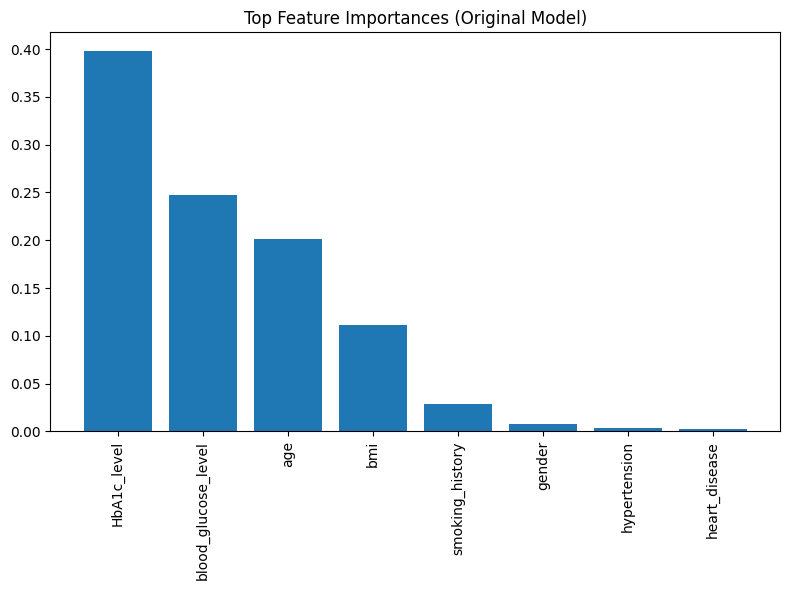

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_cv_cm = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Fit the model on the entire training data
rf_cv_cm.fit(x_train_smote, y_train_smote)


# Get feature importances
importances = rf_cv_cm.feature_importances_
feature_names = X.columns  # Assumes X_train is a DataFrame

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 6))
plt.title("Top Feature Importances (Original Model)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Model deplyment

In [130]:
import pickle
with open ('model_pickle','wb') as f :
    pickle.dump(rf,f)